# Linear Regression

## 实验说明

这个实验使用线性回归分析广告投入和商品销量之间的关系.本实验需要调用sklearn库.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

## 数据集说明

Advertising数据集是一个关于广告投入和最终销量的数据集.有3个特征维度和1个标签维度.

3个标签维度分别是商家在电视（TV）、广播（radio）和报纸（newspaper）广告上的投入.而对应商品的销售额（sales）可视为前三者的函数。

In [2]:
# pandas读入
data = pd.read_csv('Advertising.csv')    # TV、Radio、Newspaper、Sales
# print(data)
x = data[['TV', 'Radio', 'Newspaper']]
# x = data[['TV', 'Radio']]
y = data['Sales']
#print(x)
#print(y)

random_state 是随机数种子。

随机数种子：其实就是该组随机数的编号，在需要重复试验的时候，保证得到一组一样的随机数。比如你每次都填1，

其他参数一样的情况下你得到的随机数组是一样的。但填0或不填，每次都会不一样。随机数的产生取决于种子，随机

数和种子之间的关系遵从以下两个规则：种子不同，产生不同的随机数；种子相同，即使实例不同也产生相同的随机数。

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, train_size=0.8, test_size=0.2)
model = Lasso()
# model = Ridge()
alpha_can = np.logspace(-3, 2, 10)
np.set_printoptions(suppress=True)
print('alpha_can = ', alpha_can)

alpha_can =  [   0.001         0.00359381    0.0129155     0.04641589    0.16681005
    0.59948425    2.15443469    7.74263683   27.82559402  100.        ]


cv可以是整数或者交叉验证生成器或一个可迭代器，cv参数对应的4种输入列举如下：
1. None：默认参数，函数会使用默认的3折交叉验证
2. 整数k：k折交叉验证。对于分类任务，使用StratifiedKFold（类别平衡，每类的训练集占比一样多，具体可以查看官方文档）。
    对于其他任务，使用KFold
3. 交叉验证生成器：得自己写生成器，头疼，略
4. 可以生成训练集与测试集的迭代器：同上，略

注:
1. 函数`Lasso`生成一个Lasso算法模型.这种算法有一组超参数,名叫alpha.
1. `GridSearchCV`是sklearn提供的一个用于自动优化的工具.适用于数据量比较小的情况.在本实验中用于优化Lasso算法模型.
1. 调用`GridSearchCV`构造函数时的参数`cv`是交叉验证参数.
1. 调用`GridSearchCV`构造函数时的参数`param_grid`用于传入需要最优化的参数的取值.它是一个词典(同时传入参数名).


超参数：
 {'alpha': 0.59948425031894093}
lasso_model.score: 0.891103116143
mse: 2.02267181952
rmse: 1.42220667258


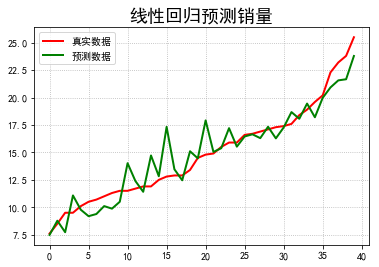

In [4]:
lasso_model = GridSearchCV(model, param_grid={'alpha': alpha_can}, cv=5)
lasso_model.fit(x_train, y_train)
print('超参数：\n', lasso_model.best_params_)

# argsort()，返回从小到大排序后，原位置所对应的索引，而数组并没有排序
order = y_test.argsort(axis=0)
y_test = y_test.values[order]
x_test = x_test.values[order, :]

y_hat = lasso_model.predict(x_test)
print('lasso_model.score:',lasso_model.score(x_test, y_test))
mse = np.average((y_hat - np.array(y_test)) ** 2)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
print('mse:', mse)
print('rmse:', rmse)

t = np.arange(len(x_test))
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(facecolor='w')
plt.plot(t, y_test, 'r-', linewidth=2, label=u'真实数据')
plt.plot(t, y_hat, 'g-', linewidth=2, label=u'预测数据')
plt.title(u'线性回归预测销量', fontsize=18)
plt.legend(loc='upper left')
plt.grid(b=True, ls=':')
plt.show()   

注:
1. 线性回归预测销量的折线图中.横坐标不是在广告上的投入.而是样本的序号.
1. 由于之前把测试样本按照销售量的大小进行了排序所以这里的折线图从左到右,销量越来越高.